In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier



In [ ]:
# Load dataset
dataset = pd.read_csv("/content/FILE_DT.csv")
dataset.describe()

,Youtube,Facebook,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,176.451000,27.916800,147.042500,23.264000,30.554000,16.827000
std,103.025084,17.816171,85.854236,14.846809,21.778621,6.260948
min,0.840000,0.000000,0.700000,0.000000,0.300000,1.920000
25%,89.250000,11.970000,74.375000,9.975000,12.750000,12.450000
50%,179.700000,27.480000,149.750000,22.900000,25.750000,15.480000
75%,262.590000,43.830000,218.825000,36.525000,45.100000,20.880000
max,355.680000,59.520000,296.400000,49.600000,114.000000,32.400000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


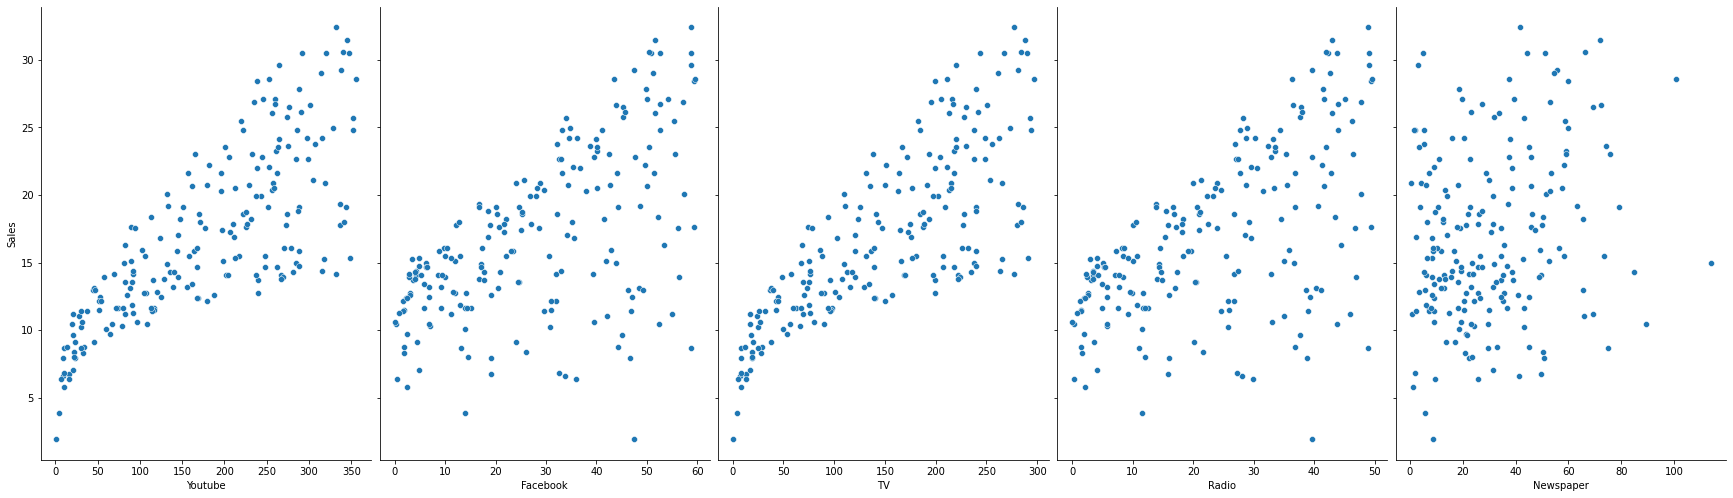

In [ ]:
import seaborn as sns
sns.pairplot(dataset, x_vars=['Youtube','Facebook','TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.7)

In [ ]:
dataset.corr()

,Youtube,Facebook,TV,Radio,Newspaper,Sales
Youtube,1.000000,0.054809,1.000000,0.054809,0.056648,0.782224
Facebook,0.054809,1.000000,0.054809,1.000000,0.354104,0.576223
TV,1.000000,0.054809,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.782224,0.576223,0.228299,1.000000


In [ ]:
cut_lables = ['Low','Medium','Hight']
cut_bins = [0,10,20,100]
dataset['Sale_label']= pd.cut(dataset['Sales'],bins=cut_bins,labels=cut_lables)
dataset

,Youtube,Facebook,TV,Radio,Newspaper,Sales,Sale_label
0,276.12,45.36,230.1,37.8,69.2,26.52,Hight
1,53.40,47.16,44.5,39.3,45.1,12.48,Medium
2,20.64,55.08,17.2,45.9,69.3,11.16,Medium
3,181.80,49.56,151.5,41.3,58.5,22.20,Hight
4,216.96,12.96,180.8,10.8,58.4,15.48,Medium
...,...,...,...,...,...,...,...
195,45.84,4.44,38.2,3.7,13.8,9.12,Low
196,113.04,5.88,94.2,4.9,8.1,11.64,Medium
197,212.40,11.16,177.0,9.3,6.4,15.36,Medium
198,340.32,50.40,283.6,42.0,66.2,30.60,Hight


In [ ]:
dataset.groupby('Sale_label').size()

Sale_label
Low        22
Medium    119
Hight      59
dtype: int64

In [ ]:
dataset.drop('Sales',axis=1,inplace=True)
dataset

,Youtube,Facebook,TV,Radio,Newspaper,Sale_label
0,276.12,45.36,230.1,37.8,69.2,Hight
1,53.40,47.16,44.5,39.3,45.1,Medium
2,20.64,55.08,17.2,45.9,69.3,Medium
3,181.80,49.56,151.5,41.3,58.5,Hight
4,216.96,12.96,180.8,10.8,58.4,Medium
...,...,...,...,...,...,...
195,45.84,4.44,38.2,3.7,13.8,Low
196,113.04,5.88,94.2,4.9,8.1,Medium
197,212.40,11.16,177.0,9.3,6.4,Medium
198,340.32,50.40,283.6,42.0,66.2,Hight


In [ ]:
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:,0:5]
y = array[:,5]
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)


In [ ]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(X_train,y_train)
predictions = decision_tree.predict(X_test)
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


0.85
[[ 9  0  3]
 [ 0  6  2]
 [ 2  2 36]]
              precision    recall  f1-score   support

       Hight       0.82      0.75      0.78        12
         Low       0.75      0.75      0.75         8
      Medium       0.88      0.90      0.89        40

    accuracy                           0.85        60
   macro avg       0.82      0.80      0.81        60
weighted avg       0.85      0.85      0.85        60



In [ ]:
print('Accuracy of the dicision tree classifier on train data {:.2f}'.format(decision_tree.score(X_train,y_train)))
print('Accuracy of the dicision tree classifier on train data {:.2f}'.format(decision_tree.score(X_test,y_test)))

Accuracy of the dicision tree classifier on train data 1.00
Accuracy of the dicision tree classifier on train data 0.85


In [ ]:
new_ads= pd.DataFrame({'Youtube':[120,35],'Facebook':[200,50],'TV':[100,50],'Radio':[25,20],'Newspaper':[20,10]})
new_ads 

,Youtube,Facebook,TV,Radio,Newspaper
0,120,200,100,25,20
1,35,50,50,20,10


In [ ]:
sale_pred= decision_tree.predict(new_ads)
sale_pred

array(['Medium', 'Medium'], dtype=object)

In [ ]:
import pandas as pd
feature_imp = pd.Series(decision_tree.feature_importances_,index=dataset.columns.values[0:5])
feature_imp

Youtube      0.340200
Facebook     0.432212
TV           0.199013
Radio        0.028576
Newspaper    0.000000
dtype: float64

No handles with labels found to put in legend.


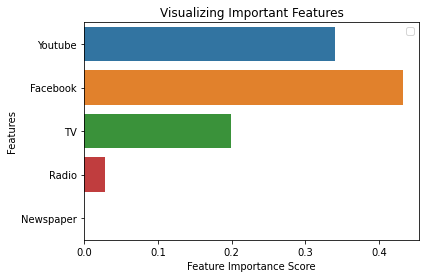

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.legend()
plt.show()

In [ ]:
feature = dataset.columns[0:5]
target = dataset['Sale_label'].unique()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from IPython.display import Image
import pydotplus

dot_data = tree.export_graphviz(decision_tree,out_file=None,feature_names=feature,class_names=target)

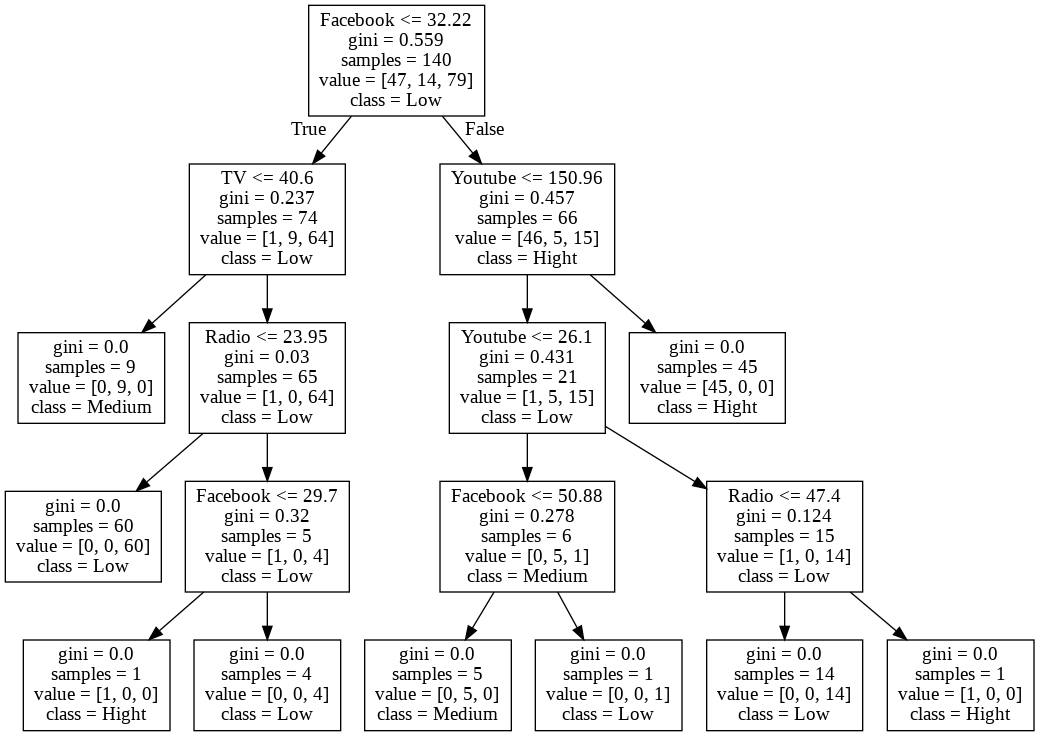

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())